### Dataset used for Deep Learning Vision

Celebrity face image dataset: https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset?resource=download

In [1]:
import os
import caer
import canaro
import cv2 as cv
import numpy as np
import gc

In [2]:
#Image are in different sizes, required to be resize before feeding to the network
IMG_SIZE = (80,80)
channels = 1 #grayscale
char_path = r'../celebrity_dl_vision/Celebrity_Faces_Dataset'

In [3]:
char_dict = {}
for char in os.listdir(char_path):
    if char == '.DS_Store':
        continue
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('ScarlettJohansson', 200),
 ('MeganFox', 100),
 ('SandraBullock', 100),
 ('LeonardoDiCaprio', 100),
 ('NicoleKidman', 100),
 ('JohnnyDepp', 100),
 ('KateWinslet', 100),
 ('NataliePortman', 100),
 ('RobertDowneyJr', 100),
 ('WillSmith', 100),
 ('HughJackman', 100),
 ('JenniferLawrence', 100),
 ('TomCruise', 100),
 ('TomHanks', 100),
 ('AngelinaJolie', 90),
 ('BradPitt', 90),
 ('DenzelWashington', 90)]

In [4]:
characters = []
for i in char_dict:
    characters.append(i[0])

In [5]:
#Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] 200 files found in 0.0008881092071533203s
[INFO] 100 files found in 0.00013065338134765625s
[INFO] 100 files found in 0.00011897087097167969s
[INFO] 100 files found in 0.0001227855682373047s
[INFO] 100 files found in 0.0001270771026611328s
[INFO] 100 files found in 0.0001239776611328125s
[INFO] 100 files found in 0.0001239776611328125s
[INFO] 100 files found in 0.00012874603271484375s
[INFO] 100 files found in 0.00011920928955078125s
[INFO] 100 files found in 0.00012302398681640625s
[INFO] 100 files found in 0.00012993812561035156s
[INFO] 100 files found in 0.0005288124084472656s
[INFO] 100 files found in 0.0001590251922607422s
[INFO] 100 files found in 0.0001227855682373047s
[INFO] 90 files found in 0.00011205673217773438s
[INFO] 90 files found in 0.00011515617370605469s
[INFO] 90 files found in 0.00011920928955078125s
------------------------------------------

In [6]:
len(train)

1770

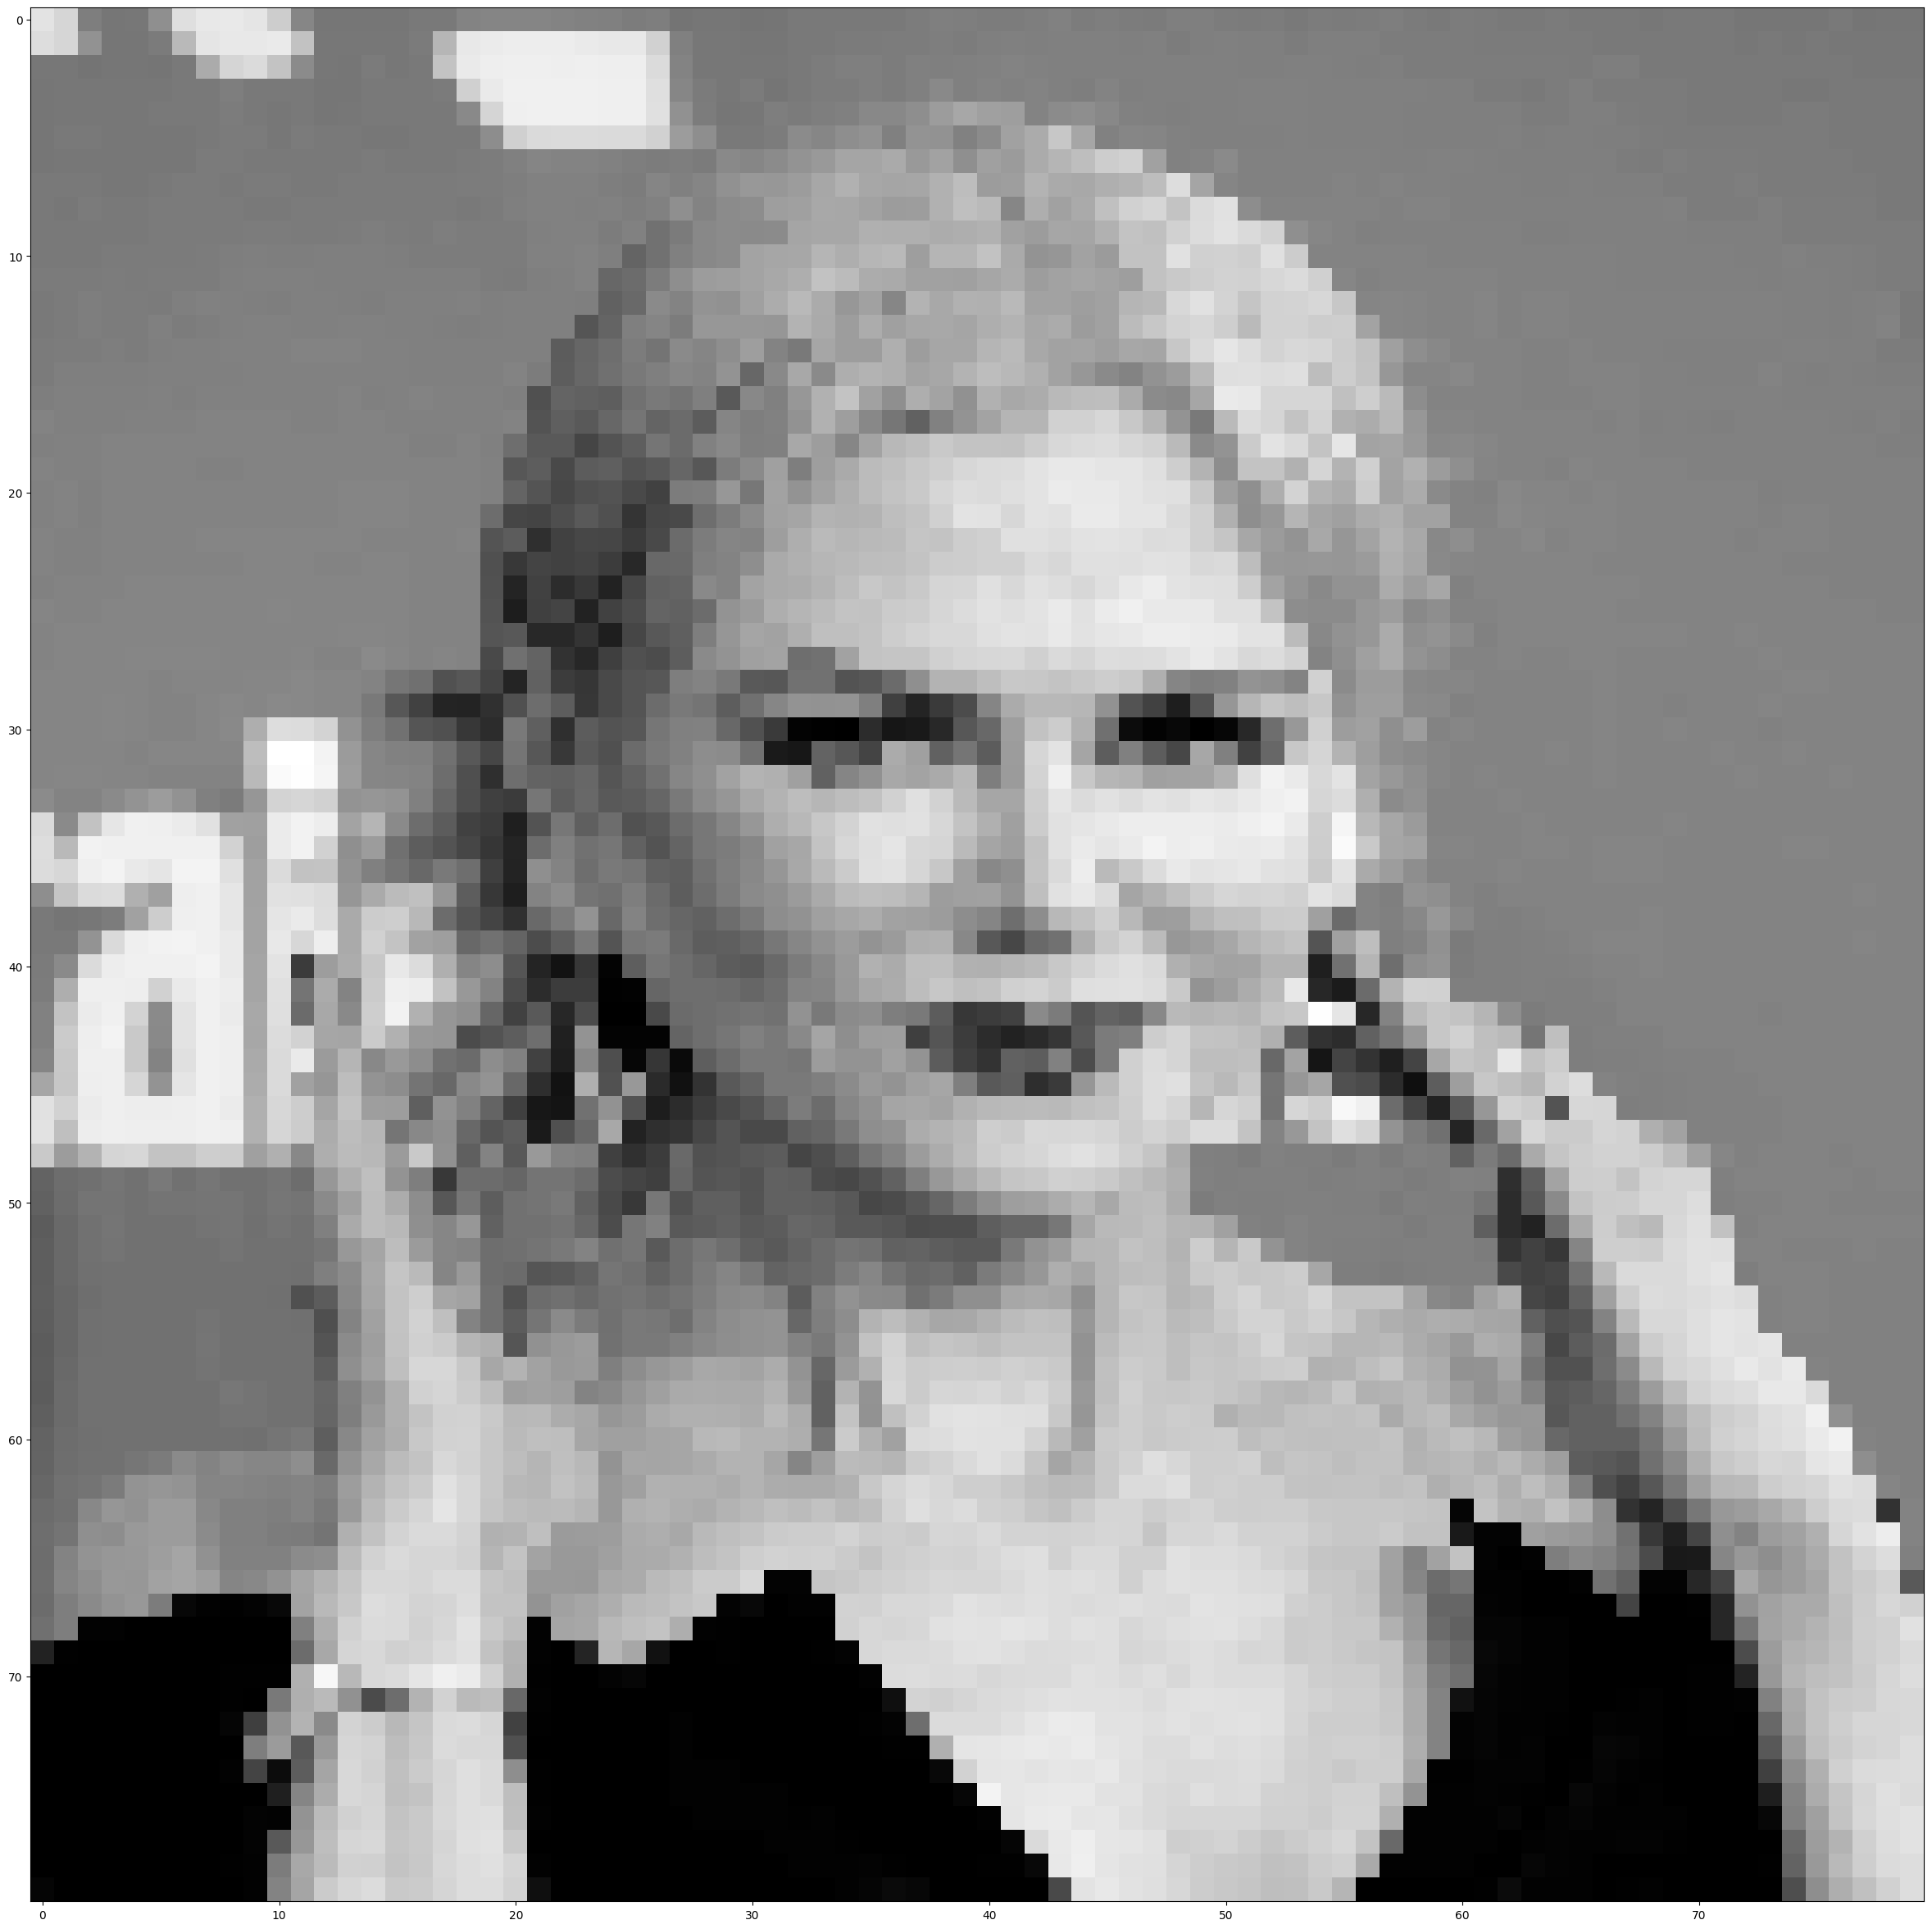

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [8]:
#seperate training set into features and labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [9]:
from tensorflow.keras.utils import to_categorical
#Normalize the featureSet to be in range (0,1), the network will learn the feature faster
featureSet = caer.normalize(featureSet)

#One hot encode the labels
labels = to_categorical(labels, len(characters))

In [10]:
# Split train, val set 80-20
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=0.2)

In [11]:
del train
del featureSet
del labels
gc.collect()

0

In [12]:
BATCH_SIZE = 32
EPOCHS = 10

In [13]:
# Image data generator, synthesized images are created during training
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [14]:
# Create our model (returns a compiled model)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

output_dim=17 #These are the number of unique characters

w, h = IMG_SIZE[:2]

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(w, h,channels)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))

# Output Layer
model.add(Dense(output_dim, activation='softmax'))

/Users/markjulie/mark_repos/.markvenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 80, 80, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 78, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │        17,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,598,449 (67.13 MB)

 Trainable params: 17,598,449 (67.13 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.001, decay=1e-7, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

/Users/markjulie/mark_repos/.markvenv/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [17]:
# Training the model

from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10


/Users/markjulie/mark_repos/.markvenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.0641 - loss: 0.6094 - val_accuracy: 0.1324 - val_loss: 0.2451 - learning_rate: 0.0100
Epoch 2/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.1250 - loss: 0.2338

/Users/markjulie/mark_repos/.markvenv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1250 - loss: 0.2338 - val_accuracy: 0.1324 - val_loss: 0.2401 - learning_rate: 0.0100
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - accuracy: 0.1056 - loss: 0.2278 - val_accuracy: 0.1324 - val_loss: 0.2356 - learning_rate: 0.0100
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0625 - loss: 0.2229 - val_accuracy: 0.1324 - val_loss: 0.2346 - learning_rate: 0.0100
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.0957 - loss: 0.2257 - val_accuracy: 0.1324 - val_loss: 0.2341 - learning_rate: 0.0100
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0625 - loss: 0.2295 - val_accuracy: 0.1324 - val_loss: 0.2342 - learning_rate: 0.0100
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.0853 - loss: 0.2256 - val_accuracy: 0.1324 - val_loss: 0.2318 - learning_rate: 0.0100
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1875 - loss: 0.2176 - val_accuracy: 

In [46]:
characters

['ScarlettJohansson',
 'MeganFox',
 'SandraBullock',
 'LeonardoDiCaprio',
 'NicoleKidman',
 'JohnnyDepp',
 'KateWinslet',
 'NataliePortman',
 'RobertDowneyJr',
 'WillSmith',
 'HughJackman',
 'JenniferLawrence',
 'TomCruise',
 'TomHanks',
 'AngelinaJolie',
 'BradPitt',
 'DenzelWashington']

### Testing

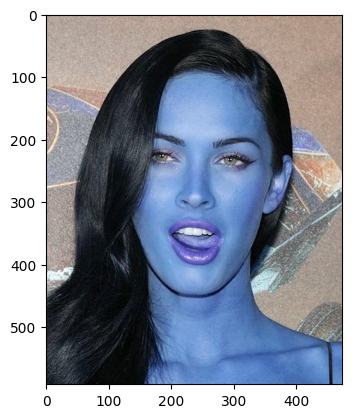

In [47]:
test_path = r'../celebrity_dl_vision/Celebrity_Face_Testing/MeganFox/001_dfb62d96.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [48]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [56]:
predictions = model.predict(prepare(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [57]:
predictions

array([[1.0000000e+00, 9.2651508e-17, 6.5315839e-12, 2.8149282e-19,
        5.8813843e-10, 6.4049796e-13, 1.3539480e-14, 6.4018589e-11,
        1.8188252e-14, 1.5423019e-17, 2.0680355e-18, 7.7961895e-14,
        8.8668188e-22, 3.2697109e-12, 8.5457518e-17, 1.8607403e-17,
        4.0895766e-19]], dtype=float32)

In [58]:
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

ScarlettJohansson
